In [16]:
import tensorflow as tf
from keras import datasets, layers, callbacks, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Import fashion mnist dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

Label:  9


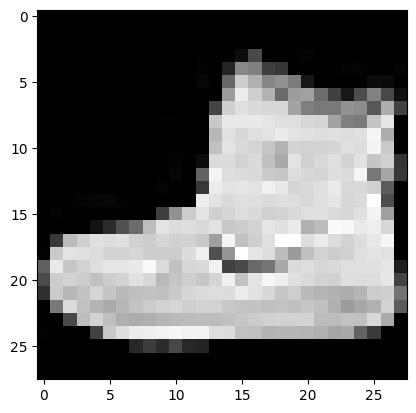

In [18]:
plt.imshow(x_train[0], cmap='gray')
print('Label: ', y_train[0])

In [19]:
N = len(x_train)
T = len(x_train[0])
D = len(x_train[0][0])

In [20]:
i = layers.Input(shape=(T, D))
# x = layers.SimpleRNN(5, activation='relu')(i)
x = layers.LSTM(5, activation='relu')(i)
x = layers.Dense(10, activation='softmax')(x)
model = models.Model(i, x)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )],
    verbose=2
)

Epoch 1/20
1875/1875 - 9s - 5ms/step - accuracy: 0.5039 - loss: 1.3076 - val_accuracy: 0.6042 - val_loss: 1.0330
Epoch 2/20
1875/1875 - 8s - 4ms/step - accuracy: 0.6384 - loss: 0.9536 - val_accuracy: 0.6596 - val_loss: 0.9078
Epoch 3/20
1875/1875 - 8s - 4ms/step - accuracy: 0.6795 - loss: 0.8590 - val_accuracy: 0.6864 - val_loss: 0.8468
Epoch 4/20
1875/1875 - 8s - 4ms/step - accuracy: 0.7010 - loss: 0.8074 - val_accuracy: 0.7044 - val_loss: 0.8118
Epoch 5/20
1875/1875 - 8s - 4ms/step - accuracy: 0.7191 - loss: 0.7710 - val_accuracy: 0.7178 - val_loss: 0.7821
Epoch 6/20
1875/1875 - 8s - 4ms/step - accuracy: 0.7349 - loss: 0.7380 - val_accuracy: 0.7432 - val_loss: 0.7233
Epoch 7/20
1875/1875 - 8s - 4ms/step - accuracy: 0.7461 - loss: 0.7088 - val_accuracy: 0.7509 - val_loss: 0.7083
Epoch 8/20
1875/1875 - 8s - 4ms/step - accuracy: 0.7569 - loss: 0.6871 - val_accuracy: 0.7555 - val_loss: 0.6901
Epoch 9/20
1875/1875 - 8s - 4ms/step - accuracy: 0.7640 - loss: 0.6700 - val_accuracy: 0.7598 - 

In [22]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7924 - loss: 0.5953


[0.5974113941192627, 0.7922999858856201]

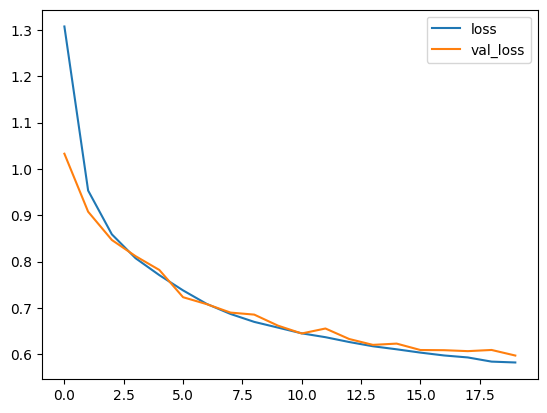

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

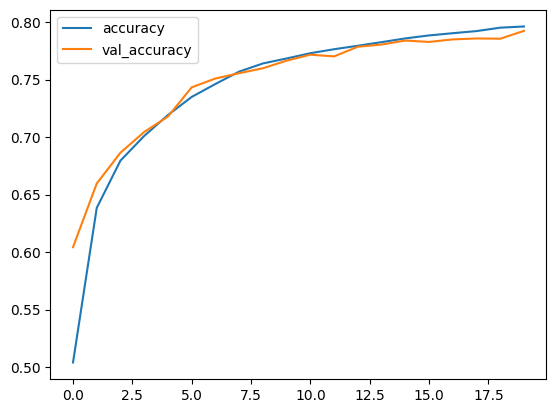

In [24]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization


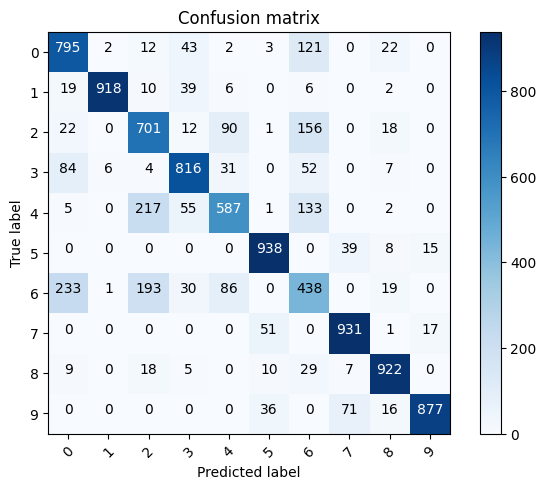

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    :param cm:
    :param classes:
    :param normalize:
    :param title:
    :param cmap:
    :return:
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

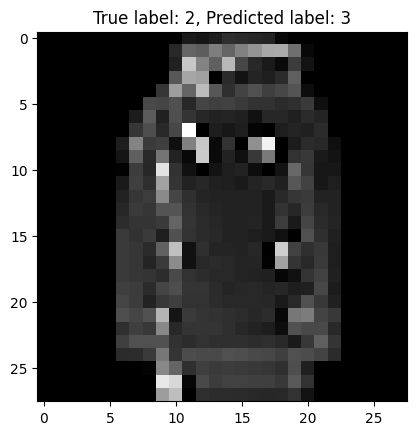

In [28]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]}, Predicted label: {p_test[i]}')
plt.show()